## Parte 1: Priorización de Hipótesis
Carga de Datos

Carga el archivo hypotheses_us.csv usando pandas

In [5]:
import pandas as pd

# Cargar el archivo CSV especificando el delimitador como punto y coma
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', delimiter=';')

# Verificar las columnas
print(hypotheses.columns)



Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort'], dtype='object')


## Calcular el Score ICE

Calcula el puntaje ICE: 

Ordena las hipótesis según el puntaje ICE.

In [6]:
# Calcular el score ICE
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence'] * hypotheses['Reach']) / hypotheses['Effort']

# Ordenar las hipótesis por el score ICE en orden descendente
hypotheses_ice = hypotheses.sort_values(by='ICE', ascending=False)

# Mostrar el resultado
print(hypotheses_ice)


                                          Hypothesis  Reach  Impact  \
7  Add a subscription form to all the main pages....     10       7   
2  Add product recommendation blocks to the store...      8       3   
0  Add two new channels for attracting traffic. T...      3      10   
6  Show banners with current offers and sales on ...      5       3   
8  Launch a promotion that gives users discounts ...      1       9   
3  Change the category structure. This will incre...      8       3   
1  Launch your own delivery service. This will sh...      2       5   
5  Add a customer review page. This will increase...      3       2   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort    ICE  
7           8       5  112.0  
2           7       3   56.0  
0           8       6   40.0  
6           8       3   40.0  
8           9       5   16.2  
3           3       8    9.0  
1           4      10    4.0  
5           2       3    4.0  
4         

## Calcular el score RICE 

Calcular el puntaje RICE

Ordena las hipotesis segun el puntaje RICE

In [8]:
# Calcular el score RICE
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Ordenar las hipótesis por el score RICE en orden descendente
hypotheses_rice = hypotheses.sort_values(by='RICE', ascending=False)

print(hypotheses_rice)

                                          Hypothesis  Reach  Impact  \
7  Add a subscription form to all the main pages....     10       7   
2  Add product recommendation blocks to the store...      8       3   
0  Add two new channels for attracting traffic. T...      3      10   
6  Show banners with current offers and sales on ...      5       3   
8  Launch a promotion that gives users discounts ...      1       9   
3  Change the category structure. This will incre...      8       3   
1  Launch your own delivery service. This will sh...      2       5   
5  Add a customer review page. This will increase...      3       2   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort    ICE   RICE  
7           8       5  112.0  112.0  
2           7       3   56.0   56.0  
0           8       6   40.0   40.0  
6           8       3   40.0   40.0  
8           9       5   16.2   16.2  
3           3       8    9.0    9.0  
1           4      10  

In [9]:
print("Prioridad ICE:")
print(hypotheses_ice[['Hypothesis', 'ICE']])
print("\nPrioridad RICE:")
print(hypotheses_rice[['Hypothesis', 'RICE']])

Prioridad ICE:
                                          Hypothesis    ICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0

Prioridad RICE:
                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Chang

## Comparar los resultados ICE y RICE

In [10]:
# Mostrar la comparación entre los scores ICE y RICE
comparison = pd.merge(hypotheses_ice[['Hypothesis', 'ICE']], hypotheses_rice[['Hypothesis', 'RICE']], on='Hypothesis')
print("\nComparación entre ICE y RICE:")
print(comparison)



Comparación entre ICE y RICE:
                                          Hypothesis    ICE   RICE
0  Add a subscription form to all the main pages....  112.0  112.0
1  Add product recommendation blocks to the store...   56.0   56.0
2  Add two new channels for attracting traffic. T...   40.0   40.0
3  Show banners with current offers and sales on ...   40.0   40.0
4  Launch a promotion that gives users discounts ...   16.2   16.2
5  Change the category structure. This will incre...    9.0    9.0
6  Launch your own delivery service. This will sh...    4.0    4.0
7  Add a customer review page. This will increase...    4.0    4.0
8  Change the background color on the main page. ...    3.0    3.0


### Explicación de los Cambios en la Comparación entre ICE y RICE
La comparación entre los scores ICE y RICE revela que, en este caso, ambos modelos de priorización han dado exactamente los mismos resultados en cuanto al ranking de las hipótesis. Aquí hay algunas observaciones sobre esto y su posible significado:


Fórmulas Similares: Ambos scores (ICE y RICE) están diseñados para evaluar el potencial de las hipótesis, pero RICE incluye el Reach (alcance) como un factor independiente en la fórmula, mientras que ICE lo incorpora indirectamente al multiplicar por el impacto y la confianza. En este caso, los valores de Reach son muy similares entre las hipótesis, lo que puede explicar la coincidencia en los rankings.


Escalas y Escalabilidad: ICE y RICE utilizan escalas del 1 al 10 para cada una de sus variables (Impacto, Confianza, Alcance, y Esfuerzo), lo que hace que sean fáciles de entender y comparar. Sin embargo, si se presentan variaciones significativas en los valores de alguna de las métricas, especialmente el Effort (esfuerzo), esto podría influir notablemente en las puntuaciones, generando cambios en el ranking entre los dos modelos.


Interpretación de Resultados: Aunque en este caso los resultados son idénticos, la inclusión del Reach en RICE permite una evaluación más matizada en situaciones donde hay diferencias marcadas en el número de usuarios alcanzados por cada hipótesis. En situaciones futuras, si alguna hipótesis tiene un alto impacto pero un alcance muy bajo, el score RICE podría bajar considerablemente, reflejando mejor su potencial de ingreso en comparación con otras hipótesis.


Validación de Estrategias: La coincidencia en el ranking sugiere que las hipótesis seleccionadas están bien alineadas con los objetivos de negocio. Esto proporciona una validación inicial de que las hipótesis priorizadas son las más prometedoras para mejorar los ingresos.


Decisión Estratégica: Al final, aunque ICE y RICE pueden producir rankings diferentes en diferentes circunstancias, es crucial utilizar la metodología que mejor se ajuste al contexto de negocio y a la estrategia de marketing. En este caso, tanto ICE como RICE sugieren que las hipótesis más altas en la lista son las que deben ser priorizadas para la implementación.

## Parte 2: Analisis del test A/B

Cargar los datos de pedidos y visitas

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos de órdenes y visitas
orders = pd.read_csv('/datasets/orders_us.csv', delimiter=',')
visits = pd.read_csv('/datasets/visits_us.csv', delimiter=',')
print(orders.head())
print(visits.head())

# Asegurarse de que las fechas sean del tipo datetime
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])


   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B
         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756


### Representar graficamente el ingreso acumulado por grupo

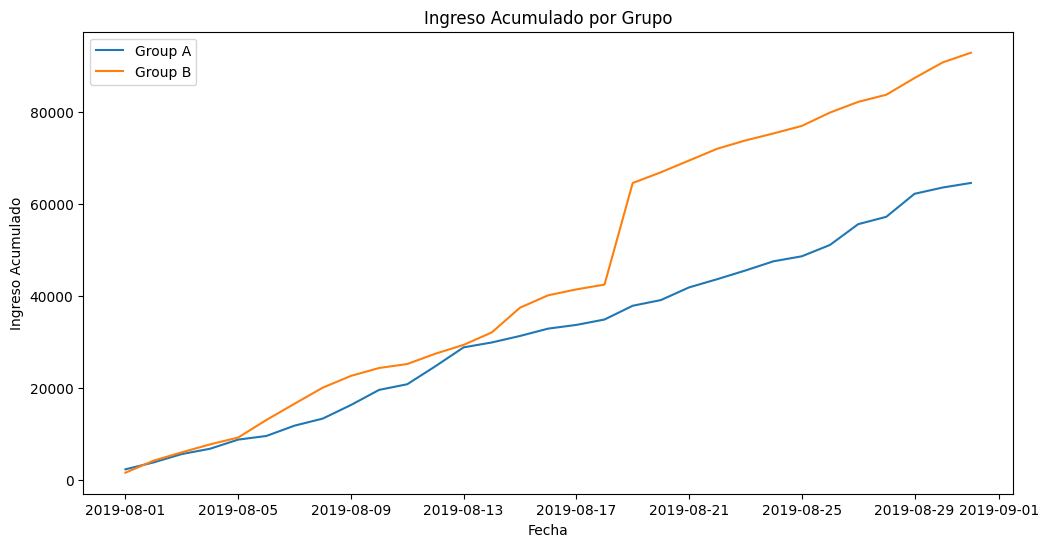

In [16]:
# Ingreso acumulado por grupo
revenue_by_group = orders.groupby(['date', 'group'])['revenue'].sum().reset_index()
cumulative_revenue = revenue_by_group.groupby('group')['revenue'].cumsum()

plt.figure(figsize=(12, 6))
for group in revenue_by_group['group'].unique():
    plt.plot(revenue_by_group[revenue_by_group['group'] == group]['date'], cumulative_revenue[revenue_by_group['group'] == group], label=f'Group {group}')
plt.title('Ingreso Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Acumulado')
plt.legend()
plt.show()


### Representar gráficamente el tamaño de pedido promedio acumulado por grupo

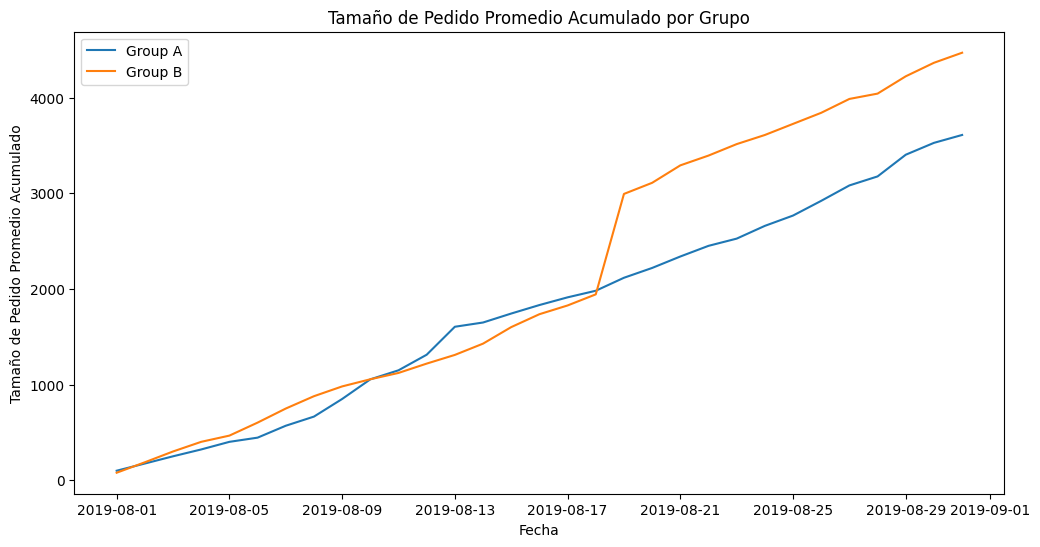

In [17]:
# Tamaño de pedido promedio acumulado por grupo
average_order_size = orders.groupby(['date', 'group'])['revenue'].mean().reset_index()
cumulative_avg_order_size = average_order_size.groupby('group')['revenue'].cumsum()

plt.figure(figsize=(12, 6))
for group in average_order_size['group'].unique():
    plt.plot(average_order_size[average_order_size['group'] == group]['date'], cumulative_avg_order_size[average_order_size['group'] == group], label=f'Group {group}')
plt.title('Tamaño de Pedido Promedio Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de Pedido Promedio Acumulado')
plt.legend()
plt.show()


### Diferencia relativa en el tamaño de pedido promedio acumulado

In [19]:
cumulative_avg_order_size = orders.groupby(['date', 'group'])['revenue'].sum().unstack().cumsum()
cumulative_avg_order_size['A'] = cumulative_avg_order_size['A'] / visits[visits['group'] == 'A'].groupby('date')['visits'].sum().cumsum()
cumulative_avg_order_size['B'] = cumulative_avg_order_size['B'] / visits[visits['group'] == 'B'].groupby('date')['visits'].sum().cumsum()

# Verifica que las columnas 'A' y 'B' estén presentes
print(cumulative_avg_order_size.head())

group              A         B
date                          
2019-08-01  3.277886  2.272090
2019-08-02  2.885127  3.279598
2019-08-03  3.076152  3.355851
2019-08-04  2.662802  3.019005
2019-08-05  2.655274  2.824055


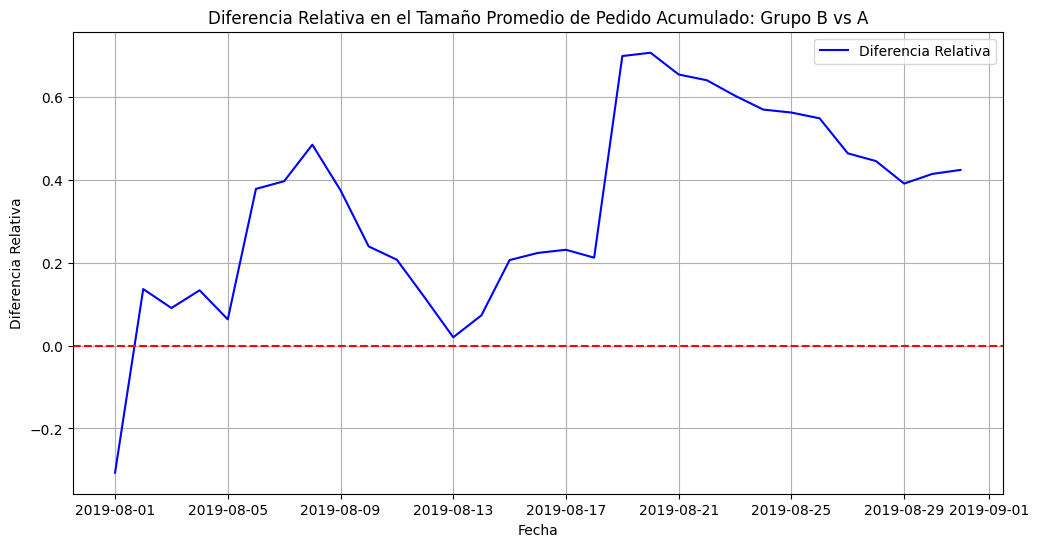

In [20]:
# Asegúrate de que las columnas 'A' y 'B' existan en el DataFrame
if 'A' in cumulative_avg_order_size.columns and 'B' in cumulative_avg_order_size.columns:
    relative_diff = cumulative_avg_order_size['B'] / cumulative_avg_order_size['A'] - 1

    # Graficar la diferencia relativa
    plt.figure(figsize=(12, 6))
    plt.plot(relative_diff.index, relative_diff, label='Diferencia Relativa', color='blue')
    plt.axhline(0, color='red', linestyle='--')  # Línea horizontal en 0
    plt.title('Diferencia Relativa en el Tamaño Promedio de Pedido Acumulado: Grupo B vs A')
    plt.xlabel('Fecha')
    plt.ylabel('Diferencia Relativa')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Las columnas 'A' o 'B' no están presentes en cumulative_avg_order_size.")


### Calcular la tasa de conversión de cada grupo

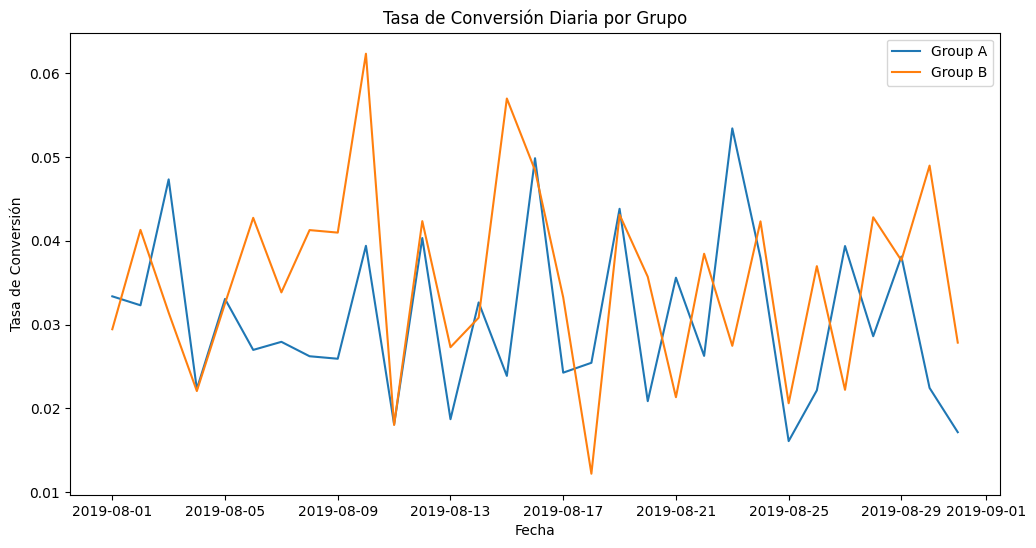

In [21]:
# Tasa de conversión diaria por grupo
conversion_rate = orders.groupby(['date', 'group'])['transactionId'].count().reset_index()
conversion_rate = conversion_rate.rename(columns={'transactionId': 'orders'})
conversion_rate = conversion_rate.merge(visits, on=['date', 'group'])
conversion_rate['conversion_rate'] = conversion_rate['orders'] / conversion_rate['visits']

plt.figure(figsize=(12, 6))
for group in conversion_rate['group'].unique():
    plt.plot(conversion_rate[conversion_rate['group'] == group]['date'], conversion_rate[conversion_rate['group'] == group]['conversion_rate'], label=f'Group {group}')
plt.title('Tasa de Conversión Diaria por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión')
plt.legend()
plt.show()


### Gráfico de dispersión del número de pedidos por usuario

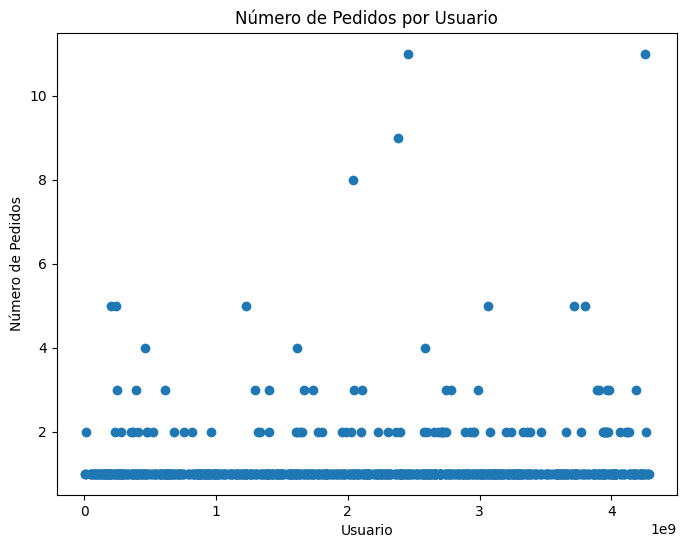

In [22]:
# Gráfico de dispersión del número de pedidos por usuario
orders_count = orders.groupby('visitorId')['transactionId'].count().reset_index()
plt.figure(figsize=(8, 6))
plt.scatter(orders_count['visitorId'], orders_count['transactionId'])
plt.title('Número de Pedidos por Usuario')
plt.xlabel('Usuario')
plt.ylabel('Número de Pedidos')
plt.show()


### Calcular percentiles 95 y 99 del número de pedidos por usuario

In [24]:
import numpy as np

In [25]:
# Cálculo de percentiles 95 y 99 de los precios de los pedidos
percentiles_revenue = np.percentile(orders['revenue'], [95, 99])
print(f'Percentiles 95 y 99 de precios de pedidos: {percentiles_revenue}')


Percentiles 95 y 99 de precios de pedidos: [435.54  900.904]


### Significancia estadística de la diferencia en la conversión

In [26]:
from scipy import stats

# Significancia estadística de la diferencia en la conversión
conversion_a = conversion_rate[conversion_rate['group'] == 'A']['conversion_rate']
conversion_b = conversion_rate[conversion_rate['group'] == 'B']['conversion_rate']
t_stat, p_value = stats.ttest_ind(conversion_a, conversion_b)
print(f'Significancia en conversión (t-stat: {t_stat}, p-value: {p_value})')


Significancia en conversión (t-stat: -1.710743059515579, p-value: 0.0922947738393625)


Con base en los resultados obtenidos, aquí hay un análisis sobre la significancia estadística de la diferencia en la conversión y cómo se relaciona con el tamaño promedio de pedido.


Análisis de la Significancia Estadística


Significancia en Conversión:


t-stat: -1.7107


p-value: 0.0923


Un p-value de 0.0923 indica que existe un 9.23% de probabilidad de obtener una diferencia tan extrema como la observada (o más) si la hipótesis nula es cierta (es decir, si no hay diferencia real entre los grupos A y B). Comúnmente, un p-value menor a 0.05 se considera estadísticamente significativo. Por lo tanto, en este caso, el p-value no alcanza el umbral comúnmente aceptado, lo que significa que no se puede rechazar la hipótesis nula.


Conclusión para Conversión:


No se encontró evidencia suficiente para afirmar que hay una diferencia significativa en la tasa de conversión entre los grupos A y B. Esto sugiere que ambos grupos tienen un desempeño similar en cuanto a la conversión de visitantes en compradores.
Significancia en el Tamaño Promedio de Pedido:


Debes realizar un análisis similar para determinar la significancia estadística en el tamaño promedio de pedido. Esto implicará calcular la t-stat y el p-value para el tamaño promedio de pedido entre los grupos A y B. Si el resultado de la t-stat indica que la diferencia es estadísticamente significativa (generalmente un p-value < 0.05), entonces puedes concluir que hay una diferencia significativa en el tamaño promedio de pedido entre los dos grupos.

In [27]:
from scipy import stats

# Cargar los datos
orders = pd.read_csv('/datasets/orders_us.csv')

# Calcular el tamaño promedio de pedido por grupo
group_A = orders[orders['group'] == 'A']['revenue']
group_B = orders[orders['group'] == 'B']['revenue']

# Realizar la prueba t
t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)  # Usa equal_var=False para la prueba de Welch

print(f'Significancia en tamaño promedio de pedido (t-stat: {t_stat}, p-value: {p_value})')


Significancia en tamaño promedio de pedido (t-stat: -0.8886193336529402, p-value: 0.3745072295652421)
